In [1]:
# import and definitions
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from functools import partial
from collections import namedtuple


**该文档未完成**

# 勒让德多项式

## 正交多项式
正交多项式是指一组多项式的集合，他们满足一个特性：
当他和自己求内积是得到的是一个常量
当和这一组多项式的其他成员求内积会得到0


<details>
  <summary>函数内积？</summary>
   待补充 
</details>


这个特性我们称之为**\"正交性\"**
既：

当m!=n时

$
\int_{-1}^{1} F_{m}(x)*F_{n}(x) = 0 
$

当m==n时

$
\int_{-1}^{1} F_{m}(x)*F_{n}(x) = C
$

用伪代码表示就是
```python
#当FuncM 和 FuncN是同一个函数时 sum = 一个常量，否则 sum = 0
sum = 0
for i = from -1 to 1:
    sum += FuncM(i)\*FuncN(i)/100
```


## 勒让德多项式
在各种各种的正交多项式家族中，我们比较关心一组叫做**\“关联勒让德多项式\”**(associated legendre polynomials)的多项式家族。
通常表示为$$P_{l}^{m}$$
其中 l 为大于等于0的正整数通常有称为band index，m为0 到 l的正整数,他们和其他正交多项式一样，在\[-1，1\] 区间满足**正交性**
于是根据l可以将这些多项式分成多组

$
P_{0}^{0}(x)\\
P_{1}^{0}(x),P_{1}^{1}(x)\\
P_{2}^{0}(x),P_{2}^{1}(x),P_{2}^{2}(x)\\
等等....
$
同时定义负数阶连带勒让德多项式为
$P_l^{-m}(x)=(-1)^m\frac{(l-m)!}{(l+m)!}P_l^m(x)$

以下为关联勒让德多项式的实现:


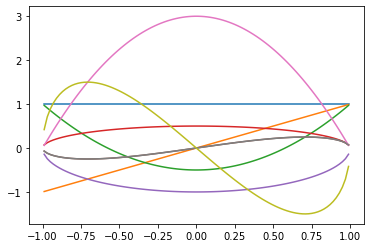

In [10]:
facttable = [math.factorial(x) for x in range(0, 40)]
# for fast factorial calculation


def factorial(x):
    return facttable[x]

# The Legendre polynomials


def P(l, m, x):
    # evaluate an Associated Legendre Polynomial P(l,m,x) at x
    fact2 = 1
    if m < 0:
        fact2 = 1.0/(pow(-1, m)*factorial(l-m)/factorial(l+m))
    m = abs(m)
    #  evaluate an Associated Legendre Polynomial P(l,m,x) at x
    pmm = 1.0

    somx2 = math.sqrt((1.0 - x) * (1.0 + x))
    fact = 1.0
    for i in range(1, m+1):  # (int i=1; i <= m; i++):
        pmm *= (-fact) * somx2
        fact += 2.0

    if (l == m):
        return pmm*fact2
    pmmp1 = x * (2.0 * m + 1.0) * pmm
    if (l == m + 1):
        return pmmp1*fact2
    pll = 0.0
    for ll in range(m+2, l+1):  # (int ll=m + 2; ll <= l; ++ll):

        pll = ((2.0 * ll - 1.0) * x * pmmp1 - (ll + m - 1.0) * pmm) / (ll - m)
        pmm = pmmp1
        pmmp1 = pll

    return pll*fact2

#打印[-1,1]区间的函数图像
XAxis = [((x+0.5)/100.0-0.5)*2 for x in range(0, 100)]

plt.plot(XAxis, [P(0, 0, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(1, 0, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, 0, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(1, -1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(1, 1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, -1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, 2, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, -1, XAxis[x]) for x in range(0, 100)])
plt.plot(XAxis, [P(2, 1, XAxis[x]) for x in range(0, 100)])


## 验证正交性
前面提到勒让德多项式满足**正交性**，既相同band index下的任意两个勒让德多项式的内积为常熟，不同band index的为0
我们可以用数值方法来求这个积分，也就是在\[-1,1\]均匀采样两个Plm，将采样的值相乘然后累加并且除以采样数

the integral = 0.0000
the integral = 0.0000
the integral = -0.2857
the integral = -3.5343


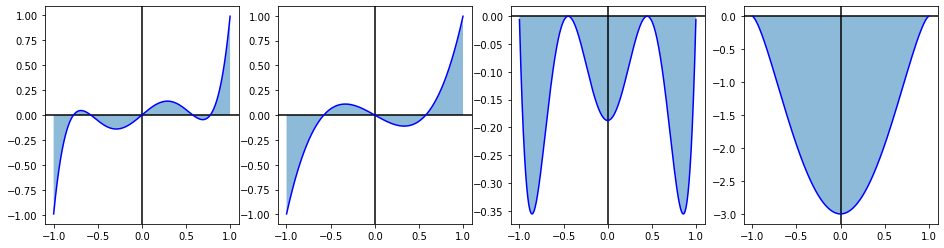

In [14]:
# verity orthogonality of P
def integrateP(l1, m1, l2, m2, fig, row, col, index):
    v1 = []
    v2 = []
    product = []
    XAxis = []
    sum = 0
    N = 1000.0
    for i in range(int(N)):
        x = ((i+0.5)/N-0.5)*2  # map [0,N) to (-1..1)
        XAxis.append(x)
        a = P(l1, m1, x)
        b = P(l2, m2, x)
        v1.append(a)
        v2.append(b)
        product.append(a*b)
        sum += (a*b)/N*2
    fig.add_subplot(row, col, index)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    # plt.plot(XAxis,v1,c="red")
    # plt.plot(XAxis,v2,c="green")
    plt.fill_between(XAxis, product,  alpha=0.5)
    plt.plot(XAxis, product, c="blue")
    print("the integral = %.4f" % sum)


fig = plt.figure(figsize=[16, 4])
integrateP(3, 0, 2, 0, fig, 1, 4, 1)  # should be zero
integrateP(1, 0, 2, 0, fig, 1, 4, 2)  # should be zero
integrateP(3, -1, 3, 1, fig, 1, 4, 3)  # should be constant
integrateP(1, 1, 2, 2, fig, 1, 4, 4)  # should be constant


# 球谐函数
yi

In [4]:

# renormalisation constant for SH function
def K(l, m):
    temp = ((2.0*l+1.0)*factorial(l-m)) / (4.0*math.pi*factorial(l+m))
    return math.sqrt(temp)
# spherical harmonic funcion


def SH(l, m, theta, phi):
    sqrt2 = math.sqrt(2.0)
    if m == 0:
        return K(l, 0)*P(l, m, math.cos(theta))
    elif m > 0:
        return sqrt2*K(l, m)*math.cos(m*phi)*P(l, m, math.cos(theta))
    else:
        return sqrt2*K(l, -m)*math.sin(-m*phi)*P(l, -m, math.cos(theta))


SHSample = namedtuple('SHSample', ['x', 'y', 'z', 'theta', 'phi', 'coeffs'])
# generate uniform samples


def getSamples(N):
    s = []
    n = float(N)
    for i in range(N):
        for j in range(N):
            randX = random.random()
            randY = random.random()
            theta = 2.0 * math.acos(math.sqrt(1.0-(i+randY)/n))
            phi = (j+randX)/n*math.pi*2
            x = math.cos(phi)*math.sin(theta)
            y = math.sin(phi)*math.sin(theta)
            z = math.cos(theta)
            coeffs = []
            for l in range(0, 4):
                for m in range(-l, l+1):
                    coeffs.append(SH(l, m, theta, phi))
            s.append(SHSample(x, y, z, theta, phi, coeffs))
    return s


def visMyFunc(func, ax, a=1, b=1, c=1, fixedTheta=-1000, fixedPhi=-1000, samplesN = 200, showSphere=False):
    x = []
    y = []
    z = []
    c = []
    samples = getSamples(samplesN)
    for s in samples:
        theta = s.theta

        phi = s.phi
        if fixedPhi > -1000:
            phi = fixedPhi
        if fixedTheta > -1000:
            theta = fixedTheta
        xx = math.cos(phi)*math.sin(theta)
        yy = math.sin(phi)*math.sin(theta)
        zz = math.cos(theta)
        v = func(theta, phi)
        if showSphere:
            x.append(xx)
            y.append(yy)
            z.append(zz)
        else:
            x.append(xx*abs(v))
            y.append(yy*abs(v))
            z.append(zz*abs(v))
        if v > 0:
            c.append([v, 0, 0])
        else:
            c.append([0, -v, 0])
    ax.scatter(x, y, z, c=c)


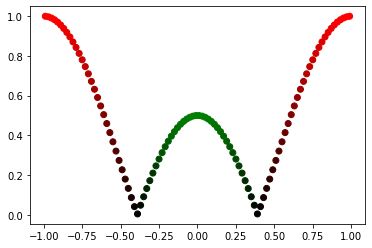

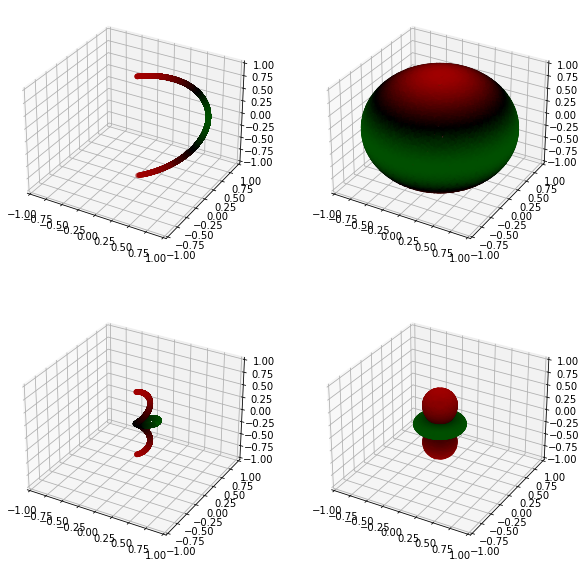

In [5]:

X = [math.cos(((x+0.5)/100.0)*math.pi) for x in range(0, 100)]
Y = [(P(2, 0, X[x])) for x in range(0, 100)]
plt.scatter(XAxis, [abs(Y[x]) for x in range(0, 100)], c=[ [Y[x],0,0] if  Y[x] >0 else [0,-Y[x],0] for x in range(0,100)])

fig, axes = plt.subplots(nrows=2, ncols=2, subplot_kw=dict(projection="3d",xlim3d=(-1,1),ylim3d=(-1,1),zlim3d=(-1,1)))
fig.set_size_inches((10,10))

visMyFunc(partial(SH, 2, 0), axes[0,0], fixedPhi=math.pi/4, showSphere=True, samplesN=100)
visMyFunc(partial(SH, 2, 0), axes[0,1], showSphere=True, samplesN=100)
visMyFunc(partial(SH, 2, 0), axes[1,0], fixedPhi=math.pi/4, samplesN=100)
visMyFunc(partial(SH, 2, 0), axes[1,1], samplesN=100)


Text(0.5, 0.92, 'SH(2,2)')

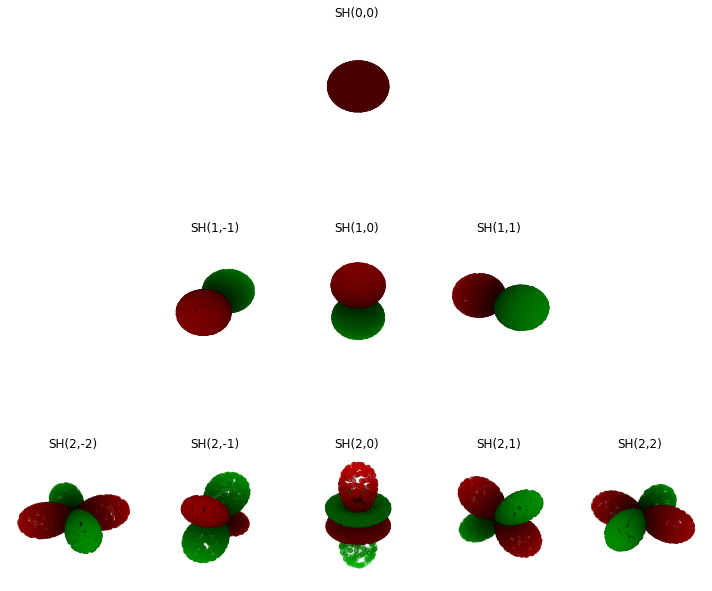

In [6]:

fig,axes = plt.subplots(   nrows = 3, ncols=5, subplot_kw=dict(projection='3d'))
fig.set_size_inches((10,10))
fig.tight_layout()
for row in axes:
    for ax in row:
        ax.grid(False)
        ax.axis(False)
        
        ax.set_xlim3d(-0.4,0.4)
        ax.set_ylim3d(-0.4,0.4)
        ax.set_zlim3d(-0.4,0.4)

        pass
        

visMyFunc(partial(SH, 0, 0), ax=axes[0,2] ,samplesN=50)
axes[0,2].set_title("SH(0,0)")
visMyFunc(partial(SH, 1, -1), axes[1,1] ,samplesN=50 )
axes[1,1].set_title("SH(1,-1)")
visMyFunc(partial(SH, 1, 0), axes[1,2] ,samplesN=50 )
axes[1,2].set_title("SH(1,0)")
visMyFunc(partial(SH, 1, 1), axes[1,3] , samplesN=50)
axes[1,3].set_title("SH(1,1)")
visMyFunc(partial(SH, 2, -2), axes[2,0] , samplesN=50)
axes[2,0].set_title("SH(2,-2)")
visMyFunc(partial(SH, 2, -1), axes[2,1] , samplesN=50)
axes[2,1].set_title("SH(2,-1)")
visMyFunc(partial(SH, 3, 0), axes[2,2] , samplesN=50)
axes[2,2].set_title("SH(2,0)")
visMyFunc(partial(SH, 2, 1), axes[2,3] , samplesN=50)
axes[2,3].set_title("SH(2,1)")
visMyFunc(partial(SH, 2, 2), axes[2,4] , samplesN=50)
axes[2,4].set_title("SH(2,2)")



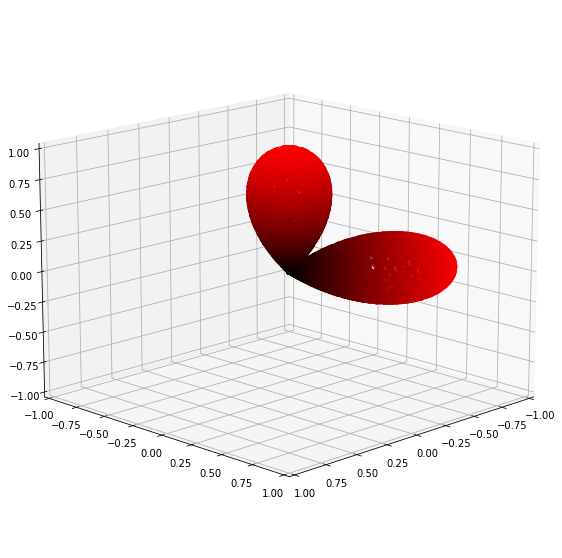

In [7]:
def myFunc(theta, phi):
    return max(0, 5*math.cos(theta)-4) + max(0, -4*math.sin(theta-math.pi)*math.cos(phi-2.5)-3)
# visualize myFunc


fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(projection="3d")
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)
ax.view_init(15,45)
visMyFunc(myFunc, ax)


In [8]:
# projection

result = []
N = 200
result = [0]*16
samples = getSamples(N)
weight = 4*math.pi
oneOverN = 1/(N*N)
factor = weight*oneOverN

for s in samples:
    f = myFunc(s.theta, s.phi)
    for i in range(16):
        result[i] += s.coeffs[i]*f*factor

print(r"the results are almost same as calculated in page 17, http://www.cse.chalmers.se/~uffe/xjobb/Readings/GlobalIllumination/Spherical%20Harmonic%20Lighting%20-%20the%20gritty%20details.pdf")
print(["%.6f" % elem for elem in result])


the results are almost same as calculated in page 17, http://www.cse.chalmers.se/~uffe/xjobb/Readings/GlobalIllumination/Spherical%20Harmonic%20Lighting%20-%20the%20gritty%20details.pdf
['0.398739', '-0.210429', '0.286642', '0.281687', '-0.314778', '-0.000174', '0.131588', '-0.000063', '0.093292', '-0.249648', '0.000161', '0.123023', '0.304012', '-0.165159', '-0.000107', '-0.091993']


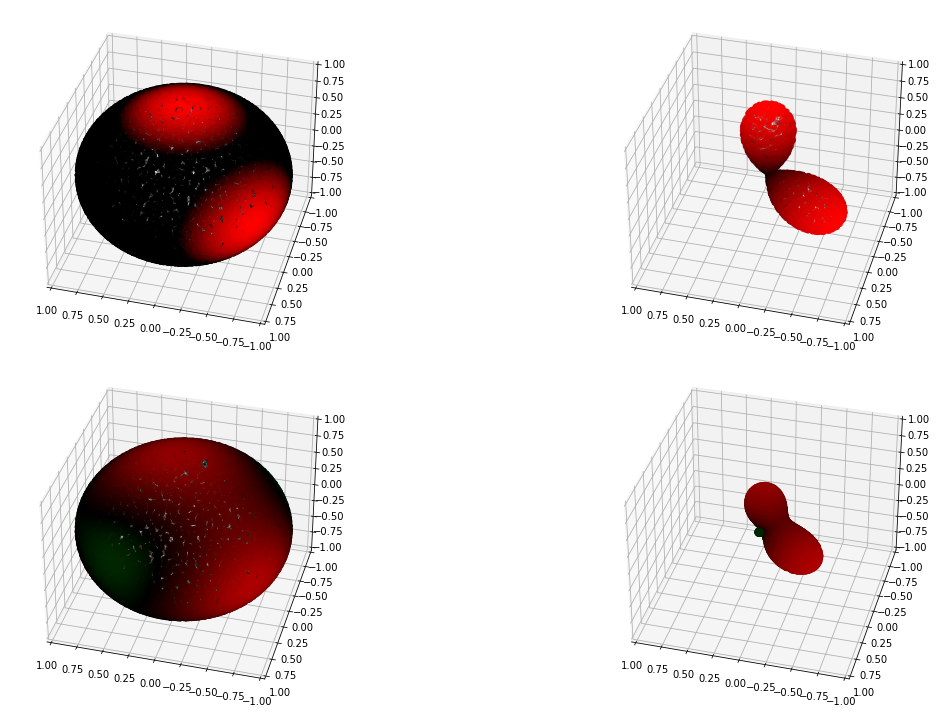

In [9]:
# rebuild
def rebuild_myFunc(coeffs, theta, phi):
    result = 0
    i = 0
    for l in range(0, 4):
        for m in range(-l, l+1):
            result += SH(l, m, theta, phi)*coeffs[i]
            i += 1
    return result


g = partial(rebuild_myFunc, result)
# show original function and compare with rebuilt from coeffs
fig,axes = plt.subplots(nrows = 2, ncols = 2,figsize=[20, 10], subplot_kw=dict(projection="3d"))
fig.tight_layout()
for row in axes:
    for ax in row:
        ax.set_xlim3d(-1,1)
        ax.set_ylim3d(-1,1)
        ax.set_zlim3d(-1,1)
        ax.view_init(35,45+60)
        
visMyFunc(myFunc, axes[0,0], samplesN=100, showSphere=True)
visMyFunc(myFunc, axes[0,1], samplesN=100)
visMyFunc(g, axes[1,0],samplesN=100,showSphere=True)
visMyFunc(g, axes[1,1],samplesN=100)
